## clean weather_data.csv and extract dates

In [1]:
import pandas as pd

In [2]:
weather_data = pd.read_csv("weather_data.csv")

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60030 entries, 0 to 60029
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Location                              60030 non-null  object
 1   Year                                  60030 non-null  int64 
 2   Date                                  60030 non-null  object
 3   Daily Rainfall Total (mm)             60030 non-null  object
 4   Highest  30-min Rainfall (mm)         60030 non-null  object
 5   Highest  60-min Rainfall (mm)         60030 non-null  object
 6   Highest 120-min Rainfall (mm)         60030 non-null  object
 7   Mean Temperature (degree celsius)     60030 non-null  object
 8   Maximum Temperature (degree celsius)  60030 non-null  object
 9   Minimum Temperature (degree celsius)  60030 non-null  object
 10  Mean Wind Speed (km/h)                60030 non-null  object
 11  Max Wind Speed (km/h)       

In [3]:
# convert "Daily Rainfall Total (mm)" column to numeric and view counts of the data

weather_data["Daily Rainfall Total (mm)"] = pd.to_numeric(weather_data["Daily Rainfall Total (mm)"], errors="coerce")
weather_data["Daily Rainfall Total (mm)"].value_counts()

0.0      24643
0.2       2436
0.4       1291
0.6       1025
0.8        878
         ...  
10.3         1
44.7         1
117.1        1
41.5         1
172.2        1
Name: Daily Rainfall Total (mm), Length: 902, dtype: int64

In [4]:
# remove rows where "Daily Rainfall Total (mm)" < 15mm

no_rain_idx = weather_data[ (weather_data["Daily Rainfall Total (mm)"] < 15) ].index
weather_data.drop(no_rain_idx, inplace=True)
weather_data.reset_index(drop = True, inplace = True)

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13131 entries, 0 to 13130
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Location                              13131 non-null  object 
 1   Year                                  13131 non-null  int64  
 2   Date                                  13131 non-null  object 
 3   Daily Rainfall Total (mm)             9660 non-null   float64
 4   Highest  30-min Rainfall (mm)         13131 non-null  object 
 5   Highest  60-min Rainfall (mm)         13131 non-null  object 
 6   Highest 120-min Rainfall (mm)         13131 non-null  object 
 7   Mean Temperature (degree celsius)     13131 non-null  object 
 8   Maximum Temperature (degree celsius)  13131 non-null  object 
 9   Minimum Temperature (degree celsius)  13131 non-null  object 
 10  Mean Wind Speed (km/h)                13131 non-null  object 
 11  Max Wind Speed 

| threshold | number of days |
|--|--|
| > 0mm | 1149 |
| >= 10mm | 1134 |
| >= 15mm | 1131 | 
| >= 20mm | 1128 |
| >= 25mm | 1127 |
| >= 30mm | 1125 |

(15.0, 20.0]      2305
(20.0, 25.0]      1637
(25.0, 30.0]      1177
(30.0, 35.0]       992
(35.0, 40.0]       716
(40.0, 45.0]       613
(45.0, 50.0]       431
(50.0, 55.0]       361
(55.0, 60.0]       289
(60.0, 65.0]       175
(65.0, 70.0]       162
(70.0, 75.0]       128
(10.0, 15.0]       103
(75.0, 80.0]        85
(80.0, 85.0]        79
(85.0, 90.0]        70
(90.0, 95.0]        47
(95.0, 100.0]       47
(100.0, 105.0]      41
(105.0, 110.0]      27
(110.0, 115.0]      25
(115.0, 120.0]      25
(120.0, 125.0]      23
(130.0, 135.0]      17
(125.0, 130.0]      16
(140.0, 145.0]      13
(135.0, 140.0]       8
(150.0, 155.0]       7
(165.0, 170.0]       7
(170.0, 175.0]       6
(145.0, 150.0]       5
(160.0, 165.0]       4
(155.0, 160.0]       3
(175.0, 180.0]       3
(185.0, 190.0]       3
(190.0, 195.0]       3
(195.0, 200.0]       2
(235.0, 240.0]       1
(200.0, 205.0]       1
(210.0, 215.0]       1
(245.0, 250.0]       1
(180.0, 185.0]       1
(205.0, 210.0]       0
(215.0, 220

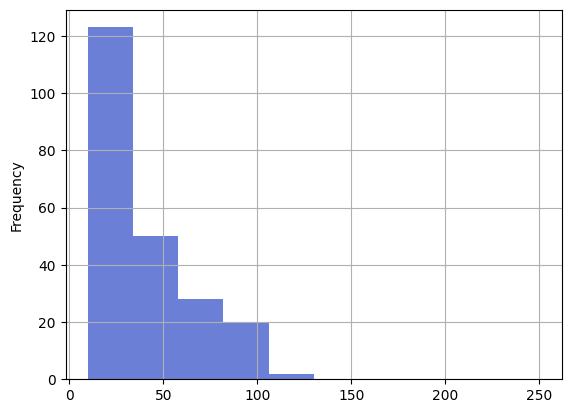

In [5]:
# view distribution of rain values recorded
max_rain = weather_data["Daily Rainfall Total (mm)"].max()
rain_values = weather_data["Daily Rainfall Total (mm)"].value_counts(bins=[i for i in range(0, 255, 5)])
weather_data["Daily Rainfall Total (mm)"].value_counts().plot.hist(grid = True, color = "#6B7FD7", range = [10,250])
rain_values

In [6]:
# convert remaining columns to numeric

numeric_cols = ["Highest  30-min Rainfall (mm)", "Highest  60-min Rainfall (mm)", "Highest 120-min Rainfall (mm)", "Mean Wind Speed (km/h)", "Mean Temperature (degree celsius)", "Maximum Temperature (degree celsius)", "Minimum Temperature (degree celsius)", "Mean Wind Speed (km/h)", "Max Wind Speed (km/h)"]

weather_data["Mean Wind Speed (km/h)"]
for col in numeric_cols:
    weather_data[col] = pd.to_numeric(weather_data[col], errors="coerce")


In [7]:
# split "Date" into "Day" and "Month" columns, then convert to numeric

weather_data[["Day", "Month"]] = weather_data["Date"].str.split(' ', expand=True)

weather_data["Day"] = pd.to_numeric(weather_data["Day"])
weather_data['Month'] = pd.to_datetime(weather_data.Month, format='%b').dt.month

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13131 entries, 0 to 13130
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Location                              13131 non-null  object 
 1   Year                                  13131 non-null  int64  
 2   Date                                  13131 non-null  object 
 3   Daily Rainfall Total (mm)             9660 non-null   float64
 4   Highest  30-min Rainfall (mm)         9591 non-null   float64
 5   Highest  60-min Rainfall (mm)         9566 non-null   float64
 6   Highest 120-min Rainfall (mm)         9567 non-null   float64
 7   Mean Temperature (degree celsius)     3454 non-null   float64
 8   Maximum Temperature (degree celsius)  3678 non-null   float64
 9   Minimum Temperature (degree celsius)  3670 non-null   float64
 10  Mean Wind Speed (km/h)                3356 non-null   float64
 11  Max Wind Speed 

In [8]:
# reorder columns for convenience

reordered_cols = ['Location', 'Year', 'Date', 'Day', 'Month', 'Daily Rainfall Total (mm)',
                  'Highest  30-min Rainfall (mm)', 'Highest  60-min Rainfall (mm)', 'Highest 120-min Rainfall (mm)',
                  'Mean Temperature (degree celsius)', 'Maximum Temperature (degree celsius)', 'Minimum Temperature (degree celsius)',
                  'Mean Wind Speed (km/h)', 'Max Wind Speed (km/h)']

weather_data = weather_data[reordered_cols]

weather_data

,Location,Year,Date,Day,Month,Daily Rainfall Total (mm),Highest 30-min Rainfall (mm),Highest 60-min Rainfall (mm),Highest 120-min Rainfall (mm),Mean Temperature (degree celsius),Maximum Temperature (degree celsius),Minimum Temperature (degree celsius),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,Paya Lebar,2023,3 Feb,3,2,39.8,19.2,20.4,32.8,26.7,32.0,23.4,7.0,29.6
1,Paya Lebar,2023,12 Feb,12,2,17.2,4.6,5.2,6.2,25.9,31.1,23.4,6.9,29.6
2,Paya Lebar,2023,13 Feb,13,2,20.8,13.2,20.8,20.8,26.8,32.5,23.8,7.0,35.2
3,Paya Lebar,2023,14 Feb,14,2,34.0,11.4,16.6,27.2,26.7,33.3,24.0,6.6,27.8
4,Paya Lebar,2023,28 Feb,28,2,162.0,18.4,28.6,43.8,24.9,27.7,22.1,6.6,29.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,Pasir Ris (Central),2020,30 Apr,30,4,56.6,18.4,25.6,26.0,NaN,NaN,NaN,NaN,NaN
13127,Pasir Ris (Central),2020,23 Mar,23,3,20.2,14.4,17.8,20.2,NaN,NaN,NaN,NaN,NaN
13128,Pasir Ris (Central),2020,11 Feb,11,2,37.0,16.6,17.0,17.2,NaN,NaN,NaN,NaN,NaN
13129,Pasir Ris (Central),2020,27 Jan,27,1,28.8,20.0,24.6,27.0,NaN,NaN,NaN,NaN,NaN


#### extract and export dates to csv

In [9]:
rainy_days_and_stations = weather_data[["Location", "Year", "Month", "Day"]]

rainy_days_and_stations.groupby(by = ["Year", "Month", "Day"]).nunique()

Location
Year Month Day          
2020 1     1           1
           2           1
           3           2
           4           3
           5           2
...                  ...
2023 2     22          1
           23          1
           26          1
           27          2
           28         49

[1131 rows x 1 columns]

In [10]:
rainy_days = weather_data[["Year", "Month", "Day"]]
rainy_days.drop_duplicates(inplace = True)

# rainy_days.to_csv("rainy_days_15mm.csv")

C:\Users\natas\AppData\Local\Temp\ipykernel_19664\3302946300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainy_days.drop_duplicates(inplace = True)
